<a href="https://colab.research.google.com/github/KsyuYu/MO/blob/main/Yurieva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# **Метод Ньютона**

## Виконала студентка групи КМ-81 Юр'єва Ксенія

# Зміст

* Вступ
* Постановка задачі
* Теоретична частина
  * Теоретичні основи методу Ньютона
  * Теоретичні основи методів штрафних функцій. Метод зовнішньої точки
  * Приведення матриці Гессе до додатньо визначеного вигляду
* Практична частина 
  * Загальні прийоми обчислення похідних у програмному коді
  * Порівняльна характеристика впливу різних параметрів на роботу програми
  * Вплив критерія закінчення на збіжність методу
* Висновки
* Список використаних джерел

----

# Вступ

В ході курсової роботи планується проведення досліджень роботи методу Ньютона мінімізації функцій, а саме як різні параметри згідно постановки задачі впливають на збіжність методу до теоретичного мінімуму. 

Метою проведення досліджень у роботі є отримання набору параметрів, при якому метод оптимізації дає найкращий результат. 

Завдання — провести дослідження збіжності методу, варіюючи при цьому схеми обчислення І-ої та ІІ-ої похідних, величину кроку в різнецевих схемах та три типи критеріїв закінчення. 

Об’єктом дослідження є метод Ньютона мінімізації функцій, а предметом — функція Розенброка та усі параметри, які впливають на роботу методу. 

Метод роботи — пошук та систематизація інформації щодо роботи методу Ньютона, написання програми для спрощення та прискорення проведення обрахунків.

----

# Постановка задачі


Дослідити збіжність методу Ньютона при мінімізації степеневої функції в залежності від:
1. Величини кроку h при обчисленні першої та другої похідних.
2. Схеми обчислення першої та другої похідних.
3. Вигляду критерію закінчення. 

$ \begin{cases}
   ‖x^{k+1}-x^k ‖/‖x^k ‖ ≤ε\\
   |f(x^{k+1})-f(x^k)|≤ε
 \end{cases}$
або
$||∇f(x^{(k)})||≤ε$

4. Способу приведення матриці Гессе до додатньо визначеного виду.
5. Модифікації методу для задач типу $F = \sum f^2_i(x)$

Використати метод штрафних функцій (метод зовнішньої точки) для умовної оптимізації в залежності від:
1. Розташування локального мінімума (всередині/поза допустимою областю).
2. Виду допустимої області (випукла/невипукла).



----

# Теоретична частина

## Теоретичні основи методу Ньютона
Розкладемо цільову функцію в ряд Тейлора, при цьому всі члени порядку 3 і вище відкидаємо — отримаємо квадратичну апроксимацію f(x):

$f(x)=f(x^{(k)})+∇f(x^{(k)})^T ∆x+1/2 ∆x^T ∇^2 f(x^{(k)})∆x $,

де $f(x)$ — апроксимуюча функція змінної $x$ в точці $x^{(k)}$.

$∆x^{(k)}=x^{(k+1)}-x^{(k)}$

Якщо $∆x^{(k)}$ — напрямок пошуку в методі Ньютона, тоді

$f(x^{(k+1)})=f(x^{(k)})+∇f(x^{(k)})^T ∆x^{(k)}+1/2 ∆x^{(k)^T} ∇^2 f(x^{(k)})∆x^{(k)}$

Мінімум функції $f(x)$ за напрямком визначається диференціюванням $f(x)$ за кожною із компонент, після чого отриманий вираз прирівнюється до 0

$∇f(x)= ∇f(x^{(k)})+∇^2 f(x^{(k)})∆x=0$.

Звідки

$∆x=-[∇^2 f(x^{(k)})]^{-1}*∇f(x^{(k)})$,

де $[∇^2 f(x^{(k)})]^{-1}$ — матриця, обернена до матриці Гессе $H(x^{(k)})$ в точці $x^{(k)}$.

Перехід з точки в точку у методі Ньютона здійснюється у вказаний далі спосіб:

$x^{(k+1)}=x^{(k)}-[∇^2 f(x^{(k)})]^{-1}*∇f(x^{(k)})$.

Напрямок і величина кроку точно визначені. У задачі пошуку мінімуму довільної квадратичної функції з додатньо визначеною матрицею Гессе метод Ньютона дає рішення за одну ітерацію, вибір початкової точки ролі не грає. У разі загальної нелінійної цільової функції метод Ньютона зійдеться до шуканої точки із квадратичною швидкістю при наступних умовах: матриця Гессе функції, що мінімізується в точці повинна бути додатньо визначена, точка початку ітераційного процесу повинна знаходитися досить близько до $x$. Так як метод Ньютона базується на квадратичній апроксимації, він має квадратичну швидкість збіжності (згадану вище), тобто виконується нерівність

$‖ε^{(k+1)}‖≤C‖ε^{(k)}‖^2$,

де стала С пов'язана з обумовленістю матриці Гессе. Алгоритму не властиве зменшення значень цільової функції від ітерації до ітерації. Для того, щоб напрямок пошуку був напрямком спуску, повинна виконуватись нерівність

$∇f(x^{(k)})^T*S(x^{(k)})<0$.

Припустимо, що поточне наближення $x^{(k)}$ не є стаціонарною точкою (тобто $∇f(x^{(k)})≠0$), і знайдемо проекцію напрямку пошуку за методом Ньютона на напрям, що задається градієнтом в точці $x^{(k)}$

$-∇f(x^{(k)})^T*∇^2 f(x^{(k)})^{-1}*∇f(x^{(k)}<0$.

У випадку коли матриця Гессе $∇^2 f(x^{(k)})$ додатньо визначена в точці $x^{(k)}$, наведена умова виконується, отже, напрямок пошуку за методом Ньютона буде напрямком спуску. Якщо в деякій точці $∇^2 f(x^{(k)})$ від’ємно визначена, то зазначений напрямок є напрямком підйому. У разі невизначеності матриці Гессе до однозначного висновку не приходять. За мінімізації, коли всі власні значення додатні $∇^2 f(x^{(k)})$ (матриця додатньо визначена), локальна квадратична апроксимація відповідає круговій чи еліптичній впадині, у якій наявний мінімум. Якщо пара власних значень має протилежні знаки (матриця невизначена), квадратична апроксимація являє собою сідло, що не має локального мінімуму. У цьому випадку рух у напрямку пошуку по методу Ньютона приведе у сідлову точку. Критерій, що гарантує збіжність методу Ньютона в припущенні, що функція $f(x)$ двічі диференційовна, полягає в тому, що матриця, обернена матриці Гессе цільової функції, повинна бути позитивно визначеною.

$[∇^2 f(x^{(k)})]^{-1}≡H^{(-1)} (x^{(k)})>0$


## Теоретичні основи методів штрафних функцій. Метод зовнішньої точки

Методи штрафних функцій використовуються для вирішення завдань нелінійного програмування. Загальна задача нелінійного програмування виглядає наступним чином:

Мінімізувати $f(x); xϵR$ з обмеженнями

$g_j (x)≥0; j=1,…,J$

$h_k (x)=0; k=1,…,K$

$x_i^{(l)}≤x_i≤x_i^{(u)}; i=1,…,n$

Передбачається, що відоме початкове наближення $x^{(0)}$, можливо недопустиме. Будується послідовність $x^{(t)}; t=1,…,T$, яка починається з &x^{(0)}& і закінчується точкою $x^{(t)}$, що дає найкраще наближення серед усіх точок побудованої послідовності.

У якості $x^{(t)}; t=1,…,T$ беруть стаціонарні точки штрафної функції. Штрафна функція — цільова функція вихідної задачі безумовної оптимізації. За допомогою штрафної функції вихідна задача умовної оптимізації перетворюється в послідовність задач безумовної оптимізації. Методи, засновані на даному підході, визначаються видом штрафної функції, а також правилами, за якими проводиться перерахунок штрафних параметрів на кожному циклі безумовної оптимізації. Штрафна функція, що дозволяє обмежитися рішенням тільки одного завдання безумовної оптимізації, називається точною. При використанні методів штрафних функцій виходить максимальний оптимізуючий ефект за рахунок постійного компромісу між необхідністю виконання обмежень і процесом мінімізації цільової функції $f(x)$, який досягається шляхом присвоєння належних вагів цільової функції і функціям, що задають обмеження. Вплив компонент штрафної функції в процесі оптимізації слабшає, а в границі повністю зникає, так що послідовність проміжних значень штрафної функції сходиться до того ж значення, що і послідовність значень $f(x^{(k)})$  і, отже, їх екстремуми однакові.

Штрафна функція визначається наступним виразом:

$P(x,R)=f(x)+Ф(R,g(x),h(x))$,

де $R$ — набір штрафних параметрів; $Ф$ — штраф, функція від $R$ і функцій, які задають обмеження. Функція $Ф$ визначається таким чином, щоб допустимі точки мали перевагу перед недопустимими щодо безумовної оптимізації штрафної функції.
Методи, засновані на перетворенні задач умовної оптимізації в задачі безумовної оптимізації повинні відповідати таким критеріям:

1) Рішення підзадач повинні збігатися до вирішення вихідної задачі.

$\lim\limits_{t\to T<∞} x^{(t)}=x^*$

2) Складність мінімізації $P(x,R)$  повинна бути того ж порядку, що і мінімізації функції $f(x)$.

3) Правило перерахунку штрафних параметрів  $R^{(t+1)}=F(R^{(t)})$ повинно бути простим (іноді складність перерахунку може бути виправдана за наявності складних функцій $f(x)$).

## Приведення матриці Гессе до додатньо визначеного вигляду

Грінштадт побудував схему на основі аналізу власних значень, що забезпечує додатню визначеність наближення. Нехай матриця $H^{*}(х)$ апроксимує $Н(х)$. Масштабуємо матрицю $Н^*(х)$ наступним чином:

$П(х)= С^{-1} (х) Н^* (х) С^{-1} (х)$,

де $С(х)$ — діагональна матриця, елементи якої рівні $c_{ii}=(|h_{ii}|)^{1/2}$, тобто являють собою додатні квадратні корені із абсолютних значень елементів головної діагоналі $Н^{*}(х)$. Тоді у матриці $П$ всі елементи головної діагоналі або додатні, або від’ємні.

Оскільки $C^{-1}(x)$  i $H^{*} (x)$ невласні і порядку $n$, то обернена матриця до їх добутку є добутком їх обернених матриць, взятих у зворотному порядку, або

$П^{-1} (х)=С(х) Н^{*-1} (х)С(х)$.

Тоді $Н^{*-1}$ може бути вирахувана по масштабованій матриці:

$Н^{*-1}(х)=С^{-1}(х)П^{-1}(х)С^{-1}(х)$.

У своїй роботі Грінштадт вказав, що $П^{-1}(х)$ можна виразити через власні значення $\alpha_і$ і власні вектори матриці $П(х)$. Власні вектори матриці, оберненої до даної,дорівнюють власним векторам вихідної матриці, а власні значення оберненої матриці — просто обернені величини власних значень вихідної матриці $(\alpha_і)^{-1}$. Таким чином,
$П^{-1} (х)= \sum\limits_{i=1}^n \alpha_i^{-1} e_i e_i^T$,

де $e_i$ — нормований власний вектор, відповідний власному значенню $\alpha_і$. Потім замість $П^{-1} (х)$ використаємо $П^{*-1}(х)$:

$П^{*-1} (х)= \sum\limits_{i=1}^n|\alpha_i|^{-1} e_i e_i^T$,

де будь яке  $\alpha_i=0$ заміняється малою додатньою величиною, так що тепер гарантована додатна визначеність $Н^{*-1} (х)$ при обрахунку за формулою

$Н^{*-1} (х)=С^{-1} (х) П^{*-1} (х) С^{-1} (х)$.




----

# Практична частина

In [ ]:
# Import the libraries we need to use in this lab

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from sympy import Symbol
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [ ]:
# Defining constants

go = 'y'

l = 1
N = 0

znach_x = []
znach_y = []
znach_z = []
R = 10000

func_usage = 0
h = 0.00001


In [ ]:
# Functions defenition

def func_rosenbroks(x1, x2):
    #global R
    global func_usage
    func_usage += 1
    return ((1 - x1) ** 2) + (100 * (x2 - (x1 ** 2)) ** 2)
    #return ((1 - x1) ** 2) + (100 * (x2 - (x1 ** 2)) ** 2) + R * (1 - (x1 ** 2) - (x2 ** 2)) + R * ((x1 ** 2) + x2 - 0.5)
    #return ((1 - x1) ** 2) + (100 * (x2 - (x1 ** 2)) ** 2) + R * (1 - (x1 ** 2) - (x2 ** 2))


def d2z(x1, x2, s):
    if s == 'x':
        fs_x = (func_rosenbroks(x1 + h, x2) - (2 * func_rosenbroks(x1, x2)) + func_rosenbroks(x1 - h, x2)) / (h * h)
    elif s == 'y':
        fs_x = (func_rosenbroks(x1, x2 + h) - (2 * func_rosenbroks(x1, x2)) + func_rosenbroks(x1, x2 - h)) / (h * h)
    else:
        print('we have trouble')
    return fs_x


## Загальні прийоми обчислення похідних у програмному коді

Метод Ньютона у ході ітераційного процесу вимагає обчислення вектора градієнта та матриці Гессе, що базуються на обрахунку похідних. Похідні, в свою чергу, можуть бути обраховані як чисельно, так і засобами бібліотек мови Python. 
Чисельні методи обчислення похідних вимагають знання точки, у якій проводиться обчислення та кроку для обрахунку однієї з трьох різнецевих схем. Використана в якості «скелета» бібліотека мови Python перетворює роботу із похідними на роботу із символьними змінними, таким чином роблячи програму частково автоматизованою. Зупинимося більш детально на символьному типі.
Спочатку імпортується пакет для роботи із символами конструкцією ```from sympy import Symbol```. Далі наведена нижче конструкція задає символьні змінні х1 та х2 і створює функцію у, від якої далі братиметься похідна за допомогою методу diff, який застосовується до у.


In [ ]:

x1 = Symbol('x1')
x2 = Symbol('x2')
z = (((1 - x1) ** 2) + (100 * (x2 - (x1 ** 2)) ** 2))
x_d = z.diff(x1)
y_d = z.diff(x2)

print('x1_d = ', x_d)
print('x2_d = ', y_d)


x1_d =  -400*x1*(-x1**2 + x2) + 2*x1 - 2
x2_d =  -200*x1**2 + 200*x2


Отримані коефіцієнти виписуються у програмний код і згодом будуть використані для обрахунку градієнта в точці — це і є часткова автоматизація процесу. Отримуємо результат, записуємо його в код.

Так само можна сформувати матрицю Гессе, застосувавши diff вже до x1_d та x2_d.
Проте за постановкою задачі необхідно проаналізувати поведінку методу в залежності від схеми обчислення похідних (першої та другої). Тож було програмно реалізовано функції, що обраховують різнецеві схеми(права, ліва, центральна). Аргументи — значення в координаті х1, координаті х2 та змінна, за якою береться похідна. Програмна реалізація виглядає так:


In [ ]:
def dev_left_func(x1, x2, s):
    if s == 'x':
        fs_x = (func_rosenbroks(x1, x2) - func_rosenbroks(x1 - h, x2)) / h
    elif s == 'y':
        fs_x = (func_rosenbroks(x1, x2) - func_rosenbroks(x1, x2 - h)) / h
    else:
        print('we have trouble')
    return fs_x


def dev_right_func(x1, x2, s):
    if s == 'x':
        fs_x = (func_rosenbroks(x1 + h, x2) - func_rosenbroks(x1, x2)) / h
    elif s == 'y':
        fs_x = (func_rosenbroks(x1, x2 + h) - func_rosenbroks(x1, x2)) / h
    else:
        print('we have trouble')
    return fs_x


def dev_midle_func(x1, x2, s):
    if s == 'x':
        fs_x = (func_rosenbroks(x1 + h, x2) - func_rosenbroks(x1 - h, x2)) / (2 * h)
    elif s == 'y':
        fs_x = (func_rosenbroks(x1, x2 + h) - func_rosenbroks(x1, x2 - h)) / (2 * h)
    else:
        print('we have trouble')
    return fs_x

Оскільки чисельна апроксимація другої похідної дає значення чистих похідних у точці, для обчислення мішаних було використано роботу із символьними функціями. 

## Порівняльна характеристика впливу різних параметрів на роботу програми

Подивимося, як поводить себе програма, отримуючи на вхід різні дані: схеми обчислення похідних та крок. Також у програмі встановлюємо лічильник, що накопичуватиме кількість обчислень значень цільової функції. У порівняння включимо і додаткову інформацію. Порівняльна характеристика різних комбінацій параметрів:


In [ ]:
print("choose derrive method: ")
scheme_selection = input()

znach_z.append(func_rosenbroks(-1.2, 0))

X = [-1.2, 0]

znach_x.append(X[0])
znach_y.append(X[1])

x1 = Symbol('x1')
x2 = Symbol('x2')

y = ((1 - x1) ** 2) + (100 * (x2 - (x1 ** 2)) ** 2)
# deltha = 2

x1d = y.diff(x1)
x2d = y.diff(x2)

k1x1_1 = 2
k1x1_3 = 400
k1x1x2 = -400
k1c = -2

k2x2 = 200
k2x1_2 = -200

print(x1d)

print(x2d)

H = [[x1d.diff(x1), x1d.diff(x2)],
     [x2d.diff(x1), x2d.diff(x2)]]

print('H = ')
print(H[0])
print(H[1])

counter = 1

while True:
    H_c = [[1200 * (X[0] ** 2) - 400 * X[1] + 2, -400 * X[0]],
           [-400 * X[0], 200]]

    print('\nH_c = ')
    print(H_c[0])
    print(H_c[1])

    H_2 = [[d2z(X[0], X[1], 'x'), -400 * X[0]],
           [-400 * X[0], d2z(X[0], X[1], 'y')]]

    print('\nH_2 = ')
    print(H_2[0])
    print(H_2[1])

    detH = (H_c[0][0] * H_c[1][1]) - (H_c[0][1] * H_c[1][0])
    print('---------------\ndetH = ', detH)

    trH = [[H_c[1][1], H_c[1][0]],
           [H_c[0][1], H_c[0][0]]]
    print('---------------\ntransposed H = ')
    print(trH[0])
    print(trH[1])

    turnH = [[(trH[0][0]/detH), (trH[0][1]/detH)],
             [(trH[1][0]/detH), (trH[1][1]/detH)]]
    print('---------------\nturned H = ')
    print(turnH[0])
    print(turnH[1])

    dY_left = [dev_left_func(X[0], X[1], 'x'), dev_left_func(X[0], X[1], 'y')]
    print('---------------\ndY_left', dY_left)

    dY_midle = [dev_midle_func(X[0], X[1], 'x'), dev_midle_func(X[0], X[1], 'y')]
    print('dY_midle', dY_midle)

    dY_right = [dev_right_func(X[0], X[1], 'x'), dev_right_func(X[0], X[1], 'y')]
    print('dY_right', dY_right)

    dY = [(-400 * X[0] * (-X[0]**2 + X[1]) + 2 * X[0] - 2), (-200 * X[0]**2 + 200 * X[1])]
    print('dY', dY)

    my_dY = []

    if scheme_selection == 'l':
        my_dY = dY_left
    if scheme_selection == 'm':
        my_dY = dY_midle
    if scheme_selection == 'r':
        my_dY = dY_right
    if scheme_selection == 'o':
        my_dY = dY


    norm_grad = math.sqrt((my_dY[0] ** 2) + (my_dY[1] ** 2))
    print('---------------\n---------------\nnorm_grad', norm_grad)

    deltha_X = [((turnH[0][0] * my_dY[0]) - (turnH[0][1]*my_dY[1])), -((turnH[1][0] * my_dY[0]) - (turnH[1][1] * my_dY[1]))]

    print('deltha x ', deltha_X)

    X = [X[0] - l * deltha_X[0], X[1] - l * deltha_X[1]]

    znach_z.append(func_rosenbroks(X[0], X[1]))
    znach_x.append(X[0])
    znach_y.append(X[1])

    abs_error = math.fabs(znach_z[counter] - znach_z[counter - 1])
    rel_error = math.fabs(1 + ((znach_z[counter] - znach_z[counter - 1]) / math.fabs(znach_z[counter - 1]))) * 100
    counter += 1
    print('---------------\nAbsolute error = ', abs_error)
    print('Relative error = ', rel_error, '%')
    print('---------------\nNew X = ', X)
    print('---------------\nAll z= ', znach_z)
    print('All y = ', znach_y)
    print('All x = ', znach_x)
    if norm_grad<0.00001:
        print("norm grad succeed")
        break
    # if abs_error<0.00001 and rel_error<0.00001:
    #     print("abs and rel succeed")
    #     break
    # counter += 1

print(f"counter: {counter}")
print(f"func usages: {func_usage}")


Схема |	Крок |	Критерій зупинки та точність |	К-сть ітерацій |	К-сть обчислень цільової функції |	Додатково
----|----|----|----|----|----
Центральна |	0.000097 |	е<0.001 abs and real |	6 |	96 |	New X =  [0.9999981230796285, 0.9999962461627785] 
Центральна |	0.00001 |	e<0.001 abs and real | 	6 |	96 |	New X =  [0.9999999796739858, 0.9999999593479691] 
Центральна |	0.0001 |	e<0.001 abs and rel |	6 |	96 |	New X =  [0.9999980052141819, 0.9999960104323411] 
Центральна |	0.0005 |	e<0.001 norm grad |	7 |	115 |	New X =  [0.9999500024929464, 0.9999000074856244] 
Центральна |	0.001 |	e<0.001 norm grad |	7 |	115 |	New X =  [0.9998000398852487, 0.9996001197542598]
Ліва |	0.000 |5	e<0.001 norm grad | 	9 |	153 |	New X =  [1.2058355866515997, 1.4542894380237057]
Ліва |	0.0001 |	e<0.001 norm grad |	7 |	115 |	New X =  [1.0316466742572359, 1.0643448547745895] 
Ліва |	0.005 |	e<0.001	| ----| ----| ----
Права |	0.00001 |	e<0.001 norm grad |	7 |	115 |	New X =  [0.9970098635907303, 0.9940236679739325] 
Права |	0.0005 |	e<0.001 norm grad |	10 |	172 |	New X =  [0.8785801457711826, 0.7716530714173243] 
Права |	0.0001 |	e<0.001 norm grad |	7 |	115|	New X =  [0.9713556875599274, 0.9434818324003665] 
Права|	0.005|	e<0.001 norm grad |	18|	324|	New X =  [0.4976273556938812, 0.24513288365795807] 
Права|	0.00001|	e<0.0001 norm grad|	7|	115|	Absolute error =  6.626694831739814e-08; Relative error =  100.74648909134154 %; New X =  [0.9970098635907303, 0.9940236679739325] 
Центральна|	0.00001|	e<0.0001 norm grad|	7	|115|	New X =  [0.9999999799999765, 0.9999999599999534] 
Ліва|	0.0001|	e<0.0001 norm grad|	7|	115|	Absolute error =  6.036556179714122e-08; Relative error =  100.66607657367439 %; New X =  [1.0030200532815536, 1.0060542271847412] 

Найкраще показала себе центральна схема обчислення похідних із кроком 0.00001 та критерієм зупинки norm grad < 0.0001. 

Тепер розглянемо умовну оптимізацію. Функція: $((1 - x1)^2) + (100 * (x2 - x1^2)^2) + R * (1 - x1^2 - x2^2)$


In [ ]:
znach_x = []
znach_y = []
znach_z = []
R = 10000
h = 0.00001


znach_z.append(func_rosenbroks(-1.2, 0))

X = [-1.2, 0]

znach_x.append(X[0])
znach_y.append(X[1])

x1 = Symbol('x1')
x2 = Symbol('x2')

y = ((1 - x1) ** 2) + (100 * (x2 - (x1 ** 2)) ** 2) + R * (1 - (x1 ** 2) - (x2 ** 2))**2 + R * ((x1 ** 2) + (x2**2) - 0.5)**2
# deltha = 2

x1d = y.diff(x1)
x2d = y.diff(x2)

k1x1_1 = 2
k1x1_3 = 400
k1x1x2 = -400
k1c = -2

k2x2 = 200
k2x1_2 = -200

print(x1d)

print(x2d)

H = [[x1d.diff(x1), x1d.diff(x2)],
     [x2d.diff(x1), x2d.diff(x2)]]

print('H = ')
print(H[0])
print(H[1])

counter = 1

while True:
    H_c = [[H[0][0].evalf(subs={x1: X[0], x2: X[1]}), H[0][1].evalf(subs={x1: X[0], x2: X[1]})],
           [H[1][0].evalf(subs={x1: X[0], x2: X[1]}), H[1][1].evalf(subs={x1: X[0], x2: X[1]})]]

    print('\nH_c = ')
    print(H_c[0])
    print(H_c[1])

    detH = (H_c[0][0] * H_c[1][1]) - (H_c[0][1] * H_c[1][0])
    print('---------------\ndetH = ', detH)

    trH = [[H_c[1][1], H_c[1][0]],
           [H_c[0][1], H_c[0][0]]]
    print('---------------\ntransposed H = ')
    print(trH[0])
    print(trH[1])

    turnH = [[(trH[0][0]/detH), (trH[0][1]/detH)],
             [(trH[1][0]/detH), (trH[1][1]/detH)]]
    print('---------------\nturned H = ')
    print(turnH[0])
    print(turnH[1])

    dY_midle = [dev_midle_func(X[0], X[1], 'x'), dev_midle_func(X[0], X[1], 'y')]
    print('dY_midle', dY_midle)

    dY = [(-400 * X[0] * (-X[0]**2 + X[1]) + 2 * X[0] - 2), (-200 * X[0]**2 + 200 * X[1])]
    print('dY', dY)

    my_dY = []


    if scheme_selection == 'm':
        my_dY = dY_midle
    if scheme_selection == 'o':
        my_dY = dY


    norm_grad = math.sqrt((my_dY[0] ** 2) + (my_dY[1] ** 2))
    print('---------------\n---------------\nnorm_grad', norm_grad)

    deltha_X = [((turnH[0][0] * my_dY[0]) - (turnH[0][1]*my_dY[1])), -((turnH[1][0] * my_dY[0]) - (turnH[1][1] * my_dY[1]))]

    print('deltha x ', deltha_X)

    X = [X[0] - l * deltha_X[0], X[1] - l * deltha_X[1]]

    znach_z.append(func_rosenbroks(X[0], X[1]))
    znach_x.append(X[0])
    znach_y.append(X[1])

    abs_error = math.fabs(znach_z[counter] - znach_z[counter - 1])
    rel_error = math.fabs(1 + ((znach_z[counter] - znach_z[counter - 1]) / math.fabs(znach_z[counter - 1]))) * 100
    counter += 1
    print('---------------\nAbsolute error = ', abs_error)
    print('Relative error = ', rel_error, '%')
    print('---------------\nNew X = ', X)
    print('---------------\nAll z= ', znach_z)
    print('All y = ', znach_y)
    print('All x = ', znach_x)
    if norm_grad<0.00001:
        print("norm grad succeed")
        break
    # if abs_error<0.00001 and rel_error<0.00001:
    #     print("abs and rel succeed")
    #     break
    # counter += 1

Випукла область:

R |	Точка
----|----
0.1 |	X =  [0.865717502130223, 0.749001707846897] 
1 |	X =  [0.801510094966007, 0.641722469423854] 
2 |	X =  [0.794454726571642, 0.630436866951462] 
3 |	 X =  [0.791897491372868, 0.626370954710029] 
4 |	X =  [0.790575060442125, 0.624273467685579] 
5 |	X =  [0.789766785545381, 0.622993197774988] 
6 |	X =  [0.789221564096125, 0.622130330304443] 
7 |	X =  [0.788828934406059, 0.621509322802078] 
8 |	X =  [0.788532694289109, 0.621040975117976] 
9 |	X =  [0.788301226220116, 0.620675152460733] 
10 |	X =  [0.788115378876008, 0.620381508432737] 
11 |	X =  [0.787962874058760, 0.620140598138266] 
12 |	X =  [0.787835477075405, 0.619939386092382] 
13 |	X =  [0.787727458754618, 0.619768806327296] 
14 |	X =  [0.787634709846609, 0.619622358249984] 
100 |	X = [0.786587458069243, 0.617969969297114] 
1000 |	X= [0.786432407792303, 0.617725512205793] 

Невипукла область:

R	| Точка
----|----
0.1 |	X =  [0.795755328617448, 0.632509795107829] 
1 |	X =  [0.723588239453218, 0.522603827107901] 
10 | X =  [0.709272833358622, 0.502041128112582] 
100 |	X =  [0.707654222832219, 0.499741966891846] 
 1000 |	X =  [0.707490132737848, 0.499509177356979] 
1000 |	X =  [0.707473700983785, 0.499485869145236] 

## Вплив критерія закінчення на збіжність методу

За дослідження поведінки норми градієнта було виявлено, що не завжди напрям мінімізації функції є напрямом спуску. Продемонструємо це налаштувавши програму на роботу із методом diff, оскільки так у нас скінченне число ітерацій. Норма градієнта змінюється так: 752.8, 4.4, 2058.4, 0.05, 0.28, 8.007914331642496e-10. Градієнт не зменшується монотонно — є підйоми. Це пов’язане із тим, що не всі напрямки є напрямками спуску.

Відносна похибка в рамках реалізації алгоритму метода Ньютона веде себе досить неоднозначно: переважно зменшується від ітерації до ітерації. А на кроці, де метод приходить до теоретичного мінімума становить близько 100%. 
Абсолютна похибка в рамках реалізації алгоритму метода Ньютона веде себе так : різко зменшується в перших ітераціях. А на кроці, де метод приходить до теоретичного мінімума становить 1.6031672985731321e-19.


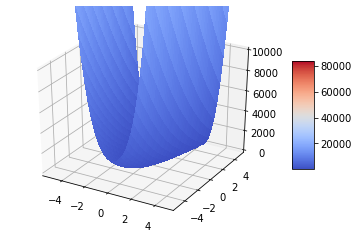

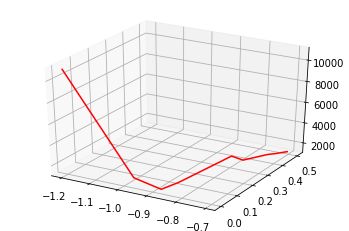

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)
Z = ((1-X)**2) + (100 * ((Y-X**2)**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-50, 10000)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.plot(znach_x, znach_y, znach_z, 'r-')
plt.show()

----

# Висновки


Було виявлено, що є два способи знайти похідні у програмах на Python: чисельні методи апроксимації похідних та засоби стандартних символьних бібліотек (дають напівавтоматизовану програму). Найкращий результат досягнуто із застосуванням центральної схеми із кроком h = 0.0001, критерієм зупину «Норма градієнта менше 0.0001»: 7 ітерацій, 115 обрахунків значень цільової функції і точка, що відхиляється від теоретичного мінімуму на [2.0000023526201005e-08, 4.00000466083128e-08]. А метод diff символьної бібліотеки дає відповідь, рівну теоретичному мінімуму, вже на шостій ітерації. Ймовірно, це відбувається через те, що з наведеним методом ми маємо змогу отримати точний аналітичний вираз для похідної, а вся похибка, що при цьому накопичується, це похибка вхідних даних, на відміну від різнецевих схем.	

Найкращими критеріями закінчення виявились норма градієнта, але за умови, що ми перейшли через стрибок: за цього викиду різко зростає як норма градієнта, так і абсолютна похибка. Відбувається це тому, що не всі напрямки мінімізації функції в ході виконання досліджень були напрямками спуску. 


----

# Список використаних джерел

1. В. Реклейтис «Оптимизация в технике» часть 1, М .; «Мир», 1986
2. Д. Химмельблау. «Прикладное нелинейное программирование». М .; «Мир», 1975.
3. Т. С. Ладогубец. «Методы оптимизации» - электронный конспект. Киев.
